In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2 as cv

In [29]:
im_CV = cv.imread('tiger.png', )
im_rgb = cv.cvtColor(im_CV, cv.COLOR_BGR2RGB)

In [22]:
#cv.imshow('image',image)

In [33]:
im_rgb.shape

(720, 1280, 3)

In [23]:
cv.destroyAllWindows()

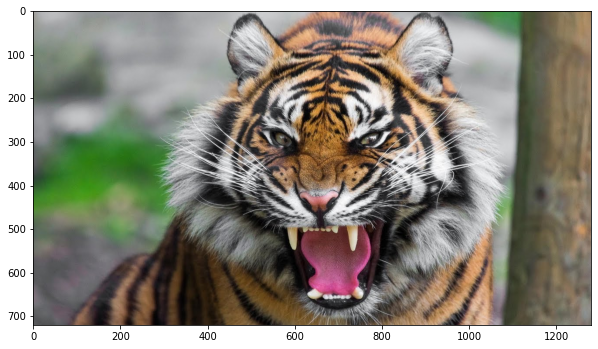

In [34]:
plt.figure(1, figsize=(10, 10))
plt.imshow(im_rgb)
plt.show()

In [60]:
im_rgb

array([[[164, 160, 159],
        [165, 161, 160],
        [164, 163, 161],
        ...,
        [160, 128,  90],
        [158, 125,  90],
        [161, 128,  93]],

       [[164, 160, 159],
        [164, 160, 159],
        [163, 162, 160],
        ...,
        [164, 132,  94],
        [162, 129,  94],
        [157, 124,  89]],

       [[163, 159, 156],
        [164, 160, 157],
        [163, 162, 160],
        ...,
        [164, 132,  94],
        [162, 129,  94],
        [157, 124,  89]],

       ...,

       [[ 93,  94,  96],
        [ 93,  94,  96],
        [ 92,  93,  95],
        ...,
        [120, 116, 107],
        [121, 117, 108],
        [122, 118, 109]],

       [[ 93,  94,  96],
        [ 93,  94,  96],
        [ 92,  93,  95],
        ...,
        [120, 116, 107],
        [121, 117, 108],
        [122, 118, 109]],

       [[ 93,  94,  96],
        [ 93,  94,  96],
        [ 92,  93,  95],
        ...,
        [119, 115, 106],
        [121, 117, 108],
        [122, 118, 109]]

In [57]:
_1D_image.reshape(3,1)

ValueError: cannot reshape array of size 2764800 into shape (3,1)

In [58]:
reshaped_array=im_rgb.reshape(-1,3)

In [62]:
reshaped_array.shape

(921600, 3)

In [63]:
reshaped_array

array([[164, 160, 159],
       [165, 161, 160],
       [164, 163, 161],
       ...,
       [119, 115, 106],
       [121, 117, 108],
       [122, 118, 109]], dtype=uint8)

In [64]:
rgb_data_set = pd.DataFrame(data=reshaped_array,columns=['R','G','B'])

In [65]:
rgb_data_set

,R,G,B
0,164,160,159
1,165,161,160
2,164,163,161
3,165,164,162
4,166,165,163
...,...,...,...
921595,122,115,107
921596,119,115,106
921597,119,115,106
921598,121,117,108


In [66]:
from sklearn.cluster import KMeans

In [67]:
Model_KM1 = KMeans(n_clusters=16)

In [68]:
Model_KM1.fit(rgb_data_set)

KMeans(n_clusters=16)

In [69]:
rgb_data_set['Lables']=Model_KM1.labels_

In [71]:
rgb_data_set

,R,G,B,Lables
0,164,160,159,1
1,165,161,160,1
2,164,163,161,1
3,165,164,162,1
4,166,165,163,1
...,...,...,...,...
921595,122,115,107,11
921596,119,115,106,11
921597,119,115,106,11
921598,121,117,108,11


In [72]:
import re, seaborn as sns
import numpy as np

In [73]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

Text(0.5, 0, 'Blue')

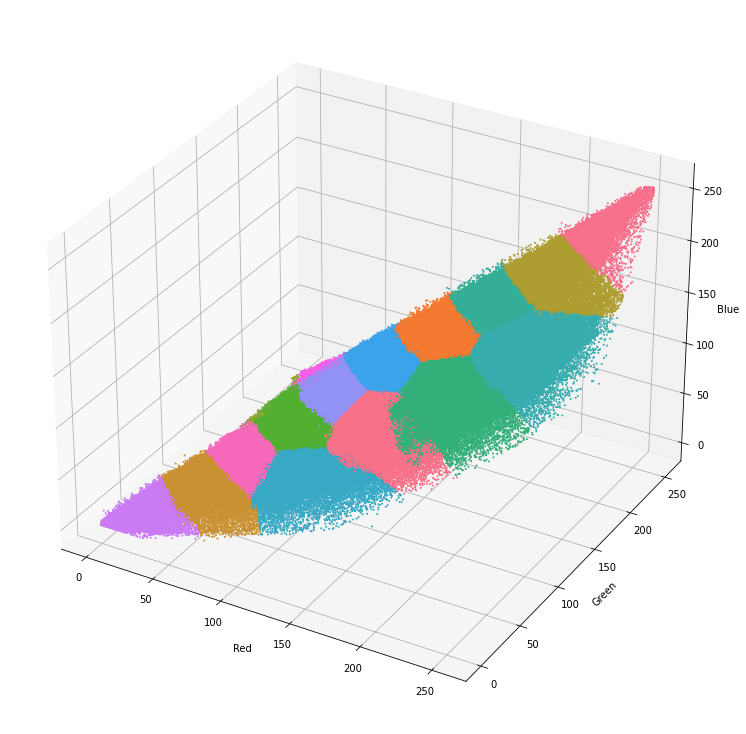

In [81]:
# axes instance
fig = plt.figure(figsize=(10,10))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

# get colormap from seaborn
cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())

# plot
sc = ax.scatter(rgb_data_set.R, rgb_data_set.G, rgb_data_set.B, s=1, c=rgb_data_set.Lables, marker='o', cmap=cmap, alpha=1, data =rgb_data_set )
ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue')



In [82]:
rgb_data_set.Lables.unique()

array([ 1,  7,  3, 10,  6,  8,  0, 11,  5, 13,  4, 14,  2, 15, 12,  9])

In [86]:
len(rgb_data_set.Lables.values)

921600

In [88]:
New_2D_Image = rgb_data_set.Lables.values.reshape(720, 1280)

In [113]:
New_2D_Image

array([[ 1,  1,  1, ...,  6,  6,  6],
       [ 1,  1,  1, ...,  6,  6,  0],
       [ 1,  1,  1, ...,  6,  6,  0],
       ...,
       [ 5,  5,  5, ..., 11, 11, 10],
       [ 5,  5,  5, ..., 11, 11, 10],
       [ 5,  5,  5, ..., 11, 11, 10]])

In [141]:
converted_image_Scaled_0_100 = ((New_2D_Image+1)*16)-1

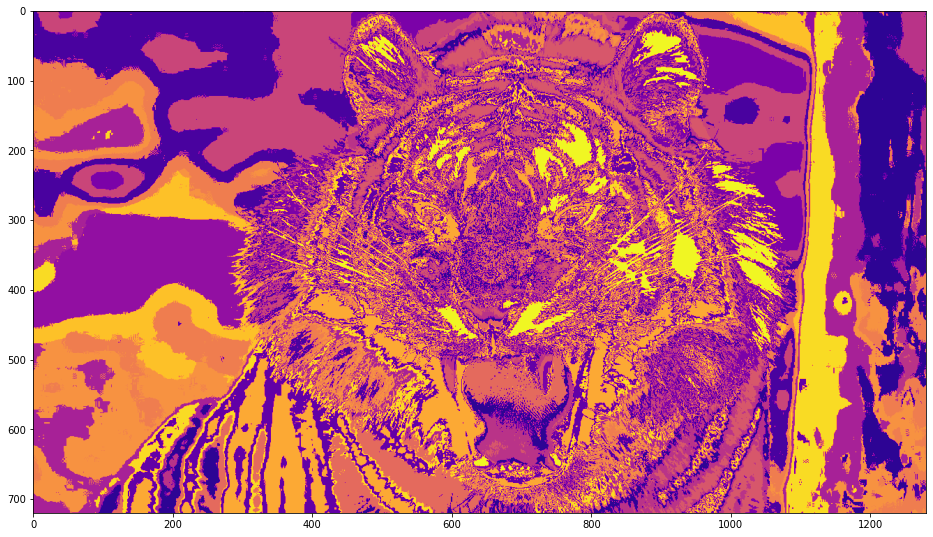

In [154]:
plt.figure(1, figsize=(16, 16))
plt.imshow(converted_image_Scaled_0_100-1, cmap='plasma', vmin=0, vmax=255)
plt.show()

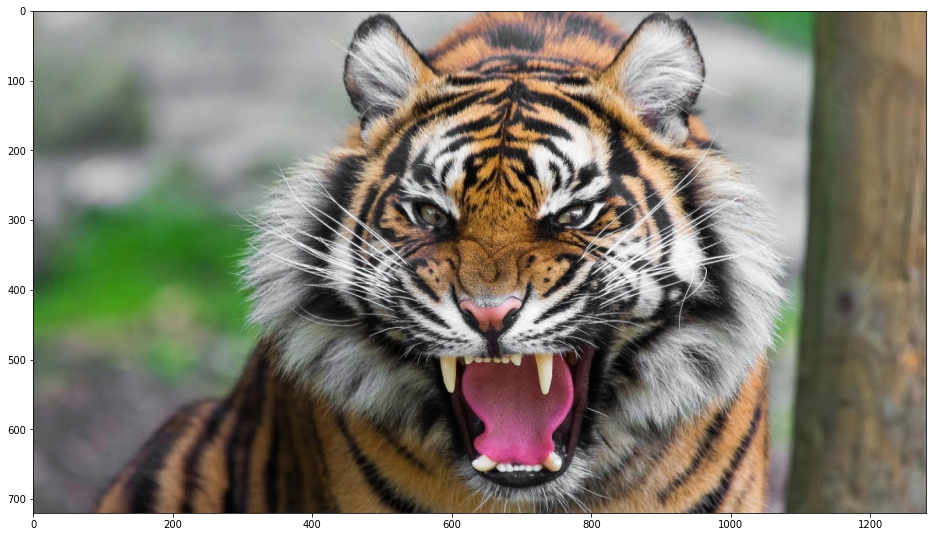

In [149]:
plt.figure(1, figsize=(16,16))
plt.imshow(im_rgb)
plt.show()

In [142]:
np.unique(converted_image_Scaled_0_100)

array([ 15,  31,  47,  63,  79,  95, 111, 127, 143, 159, 175, 191, 207,
       223, 239, 255])